In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib  import * 
from scipy import stats
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("DataTrained/baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [5]:
df.shape

(30, 17)

##### Renaming of columns


In [6]:
df.rename(columns = {'R': 'Runs','AB': 'At Bats','H': 'Hits','2B': 'Doubles','3B': 'Triples','HR': 'Homeruns',
                     'BB': 'Walks','SO': 'Strikeouts','SB': 'StolenBases','RA': 'RunsAllowed','ER': 'EarnedRuns',
                     'ERA': 'EarnedRun_Average','SHO': 'Shutouts','SV': 'Saves','CG': 'CompleteGames','E': 'Errors',
                     'W': 'Win'}, inplace = True)

In [7]:
df.columns

Index(['Win', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Walks', 'Strikeouts', 'StolenBases', 'RunsAllowed', 'EarnedRuns',
       'EarnedRun_Average', 'CompleteGames', 'Shutouts', 'Saves', 'Errors'],
      dtype='object')

<AxesSubplot:>

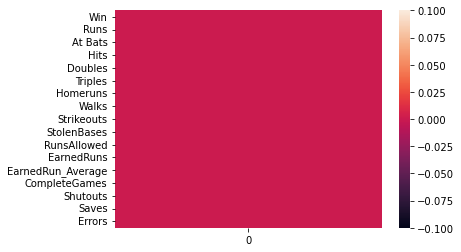

In [8]:
sns.heatmap(df.isnull().sum().to_frame())

In [9]:
df.duplicated().any()

False

Text(0.5, 1.0, 'Wins Breakdown')

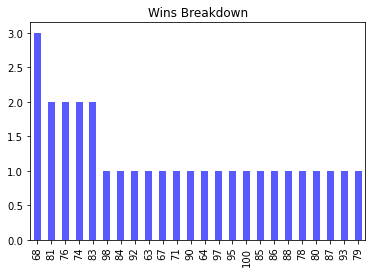

In [10]:
df.Win.value_counts().plot(kind='bar', color="blue", alpha=.65)
plt.title("Wins Breakdown")

In [11]:
def plot(df,i):
    plt.figure(figsize=(15,16))
    plt.subplot(4,3,1)
    sns.histplot(x=i,data=df,kde=True)
    plt.subplot(4,3,2)
    sns.boxplot(y=i,data=df)
    plt.subplot(4,3,3)
    plt.scatter(i,'Win',data=df)
    sns.lmplot(x=i,y='Win',data=df)
    plt.show()
    

##### Runs

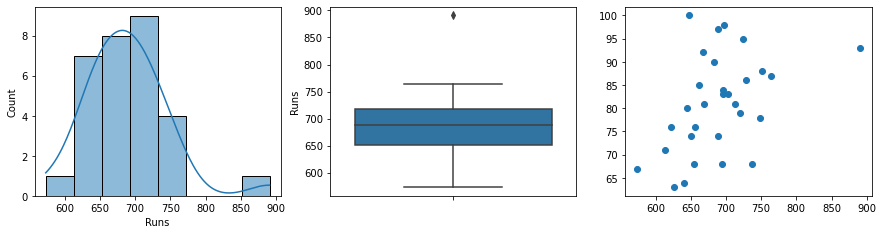

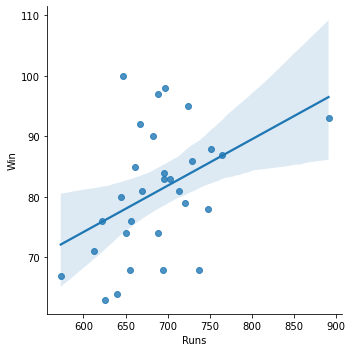

In [12]:
plot(df,'Runs')

From above plots Run and win are linearly correlated and outliers are present between 850 and 900

##### HITS

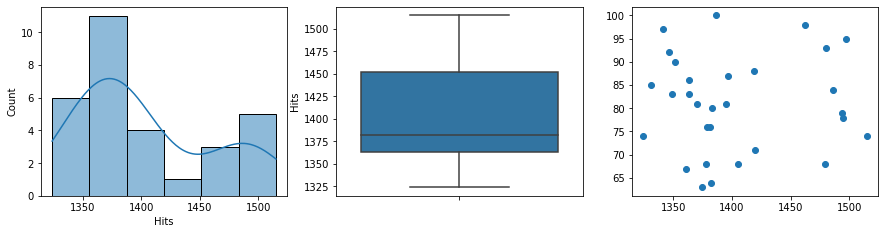

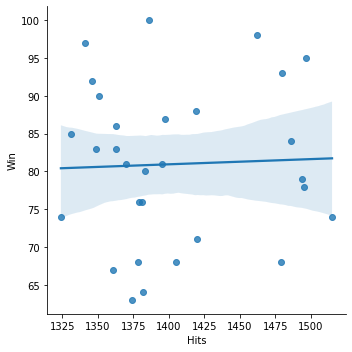

In [13]:
plot(df,'Hits')

Hits are also very weekly related to winning with no outliers

##### Doubles

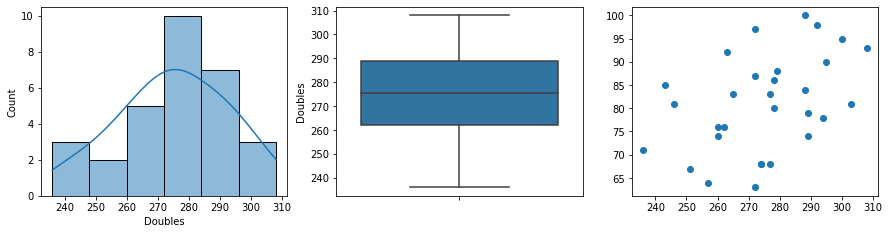

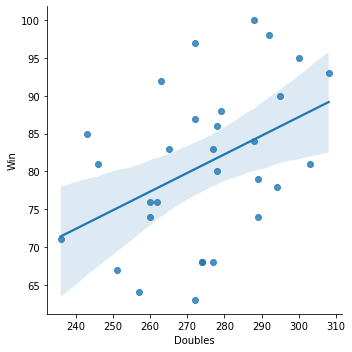

In [14]:
plot(df,'Doubles')

Doubles are linearly related with Wins, with no outlier

##### Triples

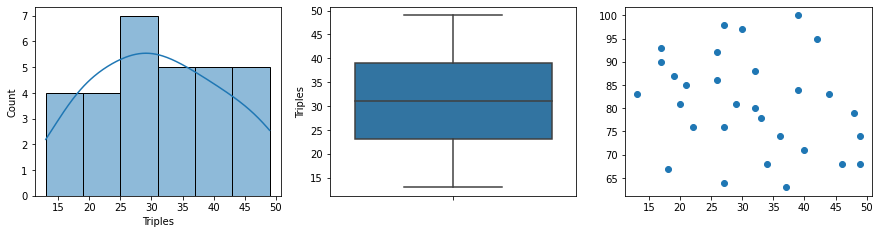

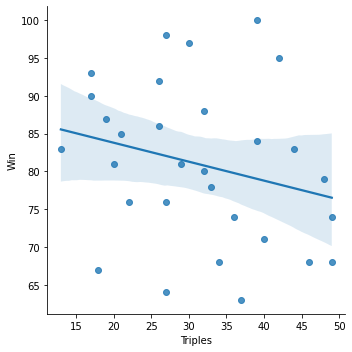

In [15]:
plot(df,'Triples')

Triple is weakly correlated with win with no outlier 

##### Homeruns

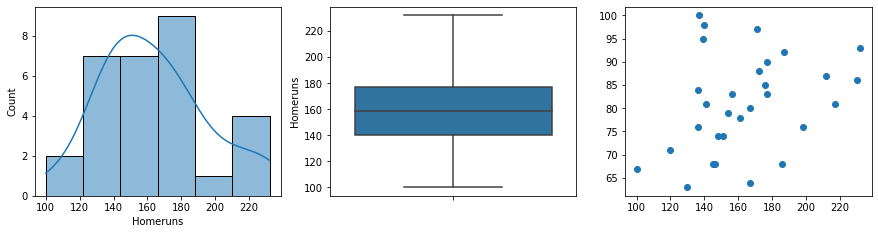

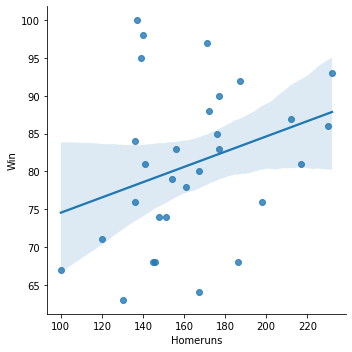

In [16]:
plot(df,'Homeruns')

The home run has a very low correlation with wins with no lot of outliers and data is right-skewed

##### Walks

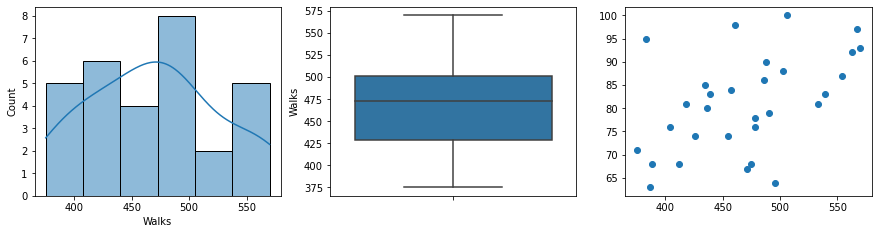

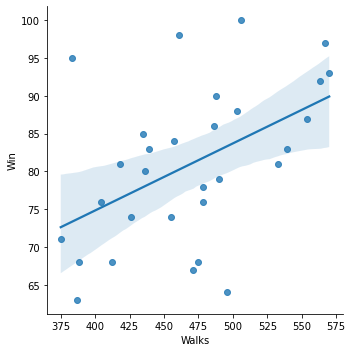

In [17]:
plot(df,'Walks')

Walk is lightly correlated to win with no outlier

##### Strikeouts

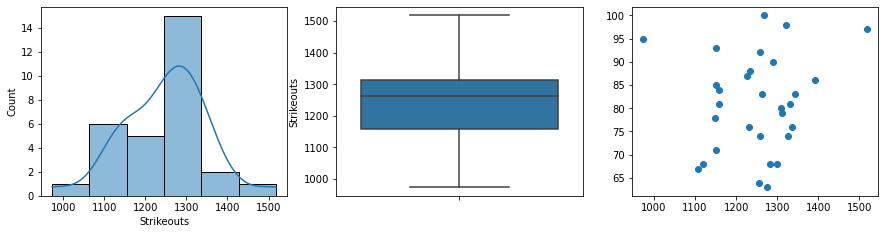

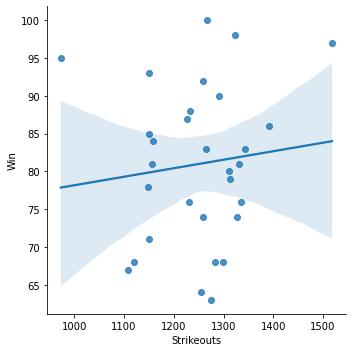

In [18]:
plot(df,'Strikeouts')

Strikeout is not correlated to win with no outlier and the dataset is left-skewed

##### StolenBases

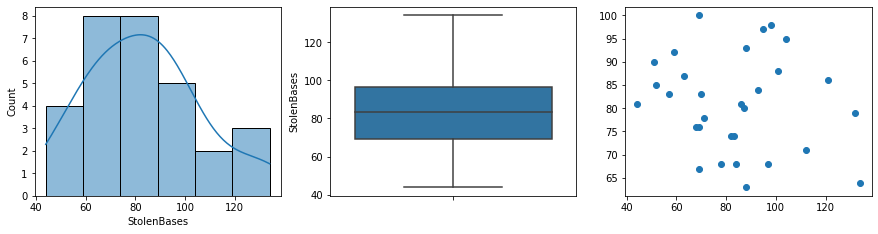

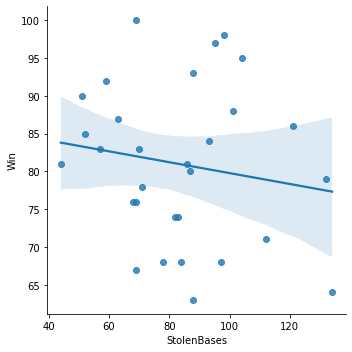

In [19]:
plot(df,'StolenBases')

Stolen Bases is not much correlated with win and there are no outlier

##### RunsAllowed

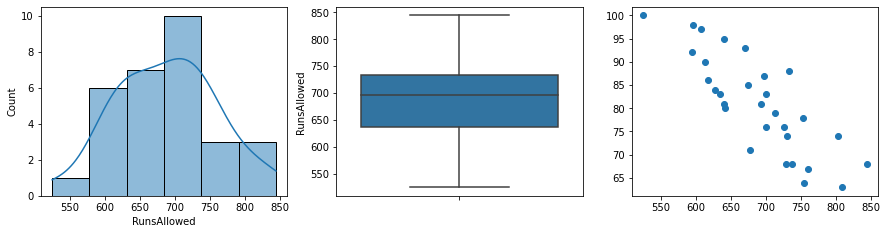

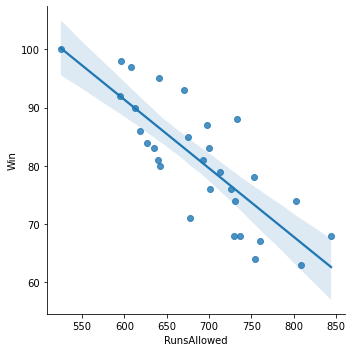

In [20]:
plot(df,'RunsAllowed')

Stolen Bases is not correlated to win with no outlier

##### EarnedRun_Average

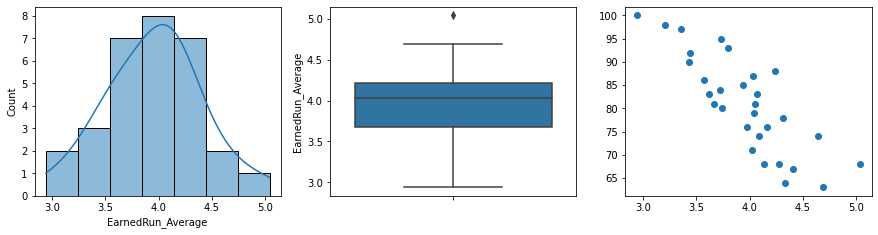

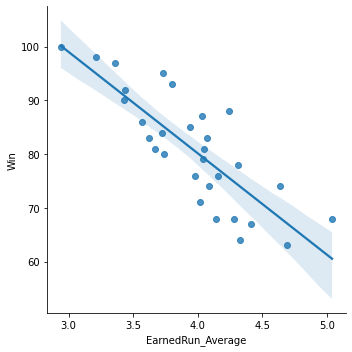

In [21]:
plot(df,'EarnedRun_Average')

Earned Run Average is not correlated to win with no outliers and data is right-skewed.

##### Shutouts

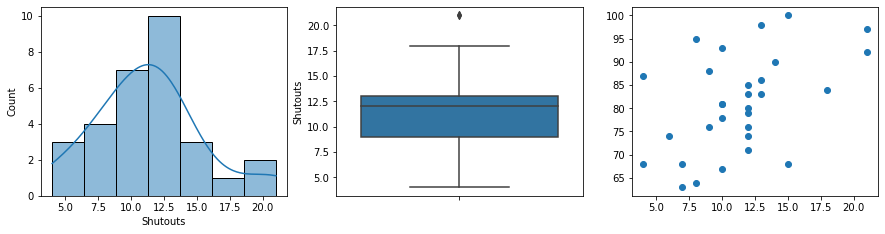

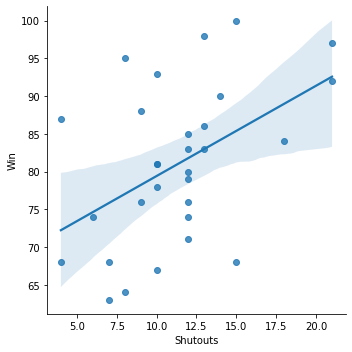

In [22]:
plot(df,'Shutouts')

Shutouts are highly correlated to win and data is right-skewed.

##### Saves

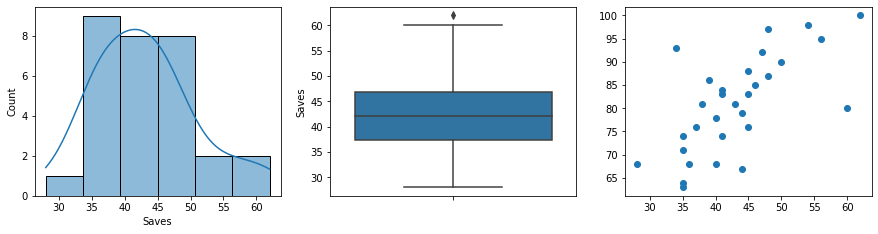

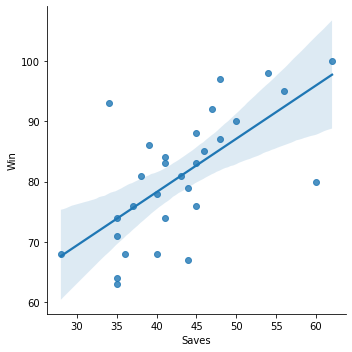

In [23]:
plot(df,'Saves')

Saves are lightly correlated to win

##### CompleteGames

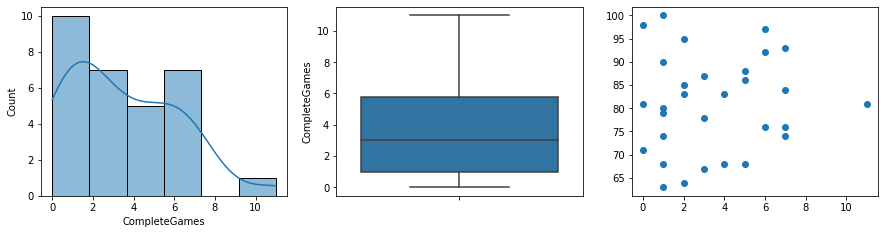

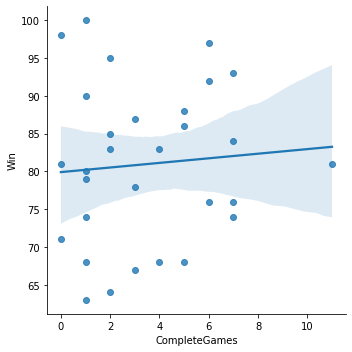

In [24]:
plot(df,'CompleteGames')

The data is right-skewd with no outliers

##### Errors

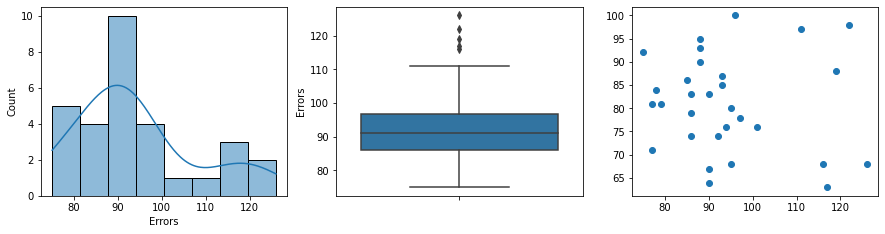

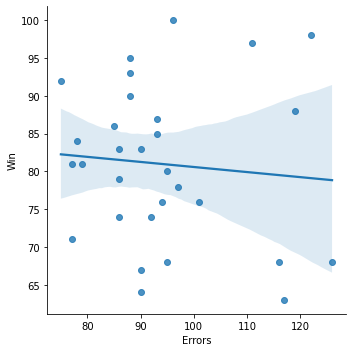

In [25]:
plot(df,'Errors')

The data has outliers and data is right-skewed

1) The number of runs, home runs, doubles, Saves, Shutouts, and Walks are highly positively linearly correlated.

2) Stolen Bases, Runs Allowed, Earned Runs are highly negative linearly correlated.

3) The remaining features have less to no linear correlation with no of Wins

## standardization

In [26]:
target = df['Win']
df =df.drop('Win', axis=1)

In [27]:
from sklearn.preprocessing import StandardScaler

object= StandardScaler()
# standardization 
scale = object.fit_transform(df) 
print(scale)

[[ 0.61907797  0.84773126  1.66368512  1.42017307  1.04119304 -0.7872986
  -1.53490242 -2.69762957  0.91388329 -0.66623393 -0.50511008 -0.50695519
  -0.5398062  -0.81462859  1.67160651 -0.46146963]
 [ 0.13443166 -0.71109353 -0.97068076  0.12740339  1.23580856 -0.24396668
  -0.5365919   0.15487844 -0.60182558  0.16597077  0.24892985  0.25459752
  -0.5398062   0.1728      0.24987932 -0.60719689]
 [-0.33290586 -1.1152333  -0.15189137  1.58879521 -0.22380785 -0.7233772
   1.13914361 -0.89398189  0.11144918 -0.68033909 -0.75162313 -0.64134684
   2.77264091 -0.32091429 -0.65485616 -1.11724227]
 [-1.14641931  0.24152162 -0.40108814 -0.82812203 -0.41842337 -0.8831807
  -1.16053598 -0.16860185 -0.69098493  0.18007593  0.10392217  0.05301004
   1.3004422  -0.56777144 -0.78410408  0.48575751]
 [ 0.01327008  1.28073815  1.98408098  0.80189192  1.72234737 -0.40377019
  -0.25136033  0.10586628 -0.02228984  1.61880269  1.59750126  1.53131824
   1.3004422   0.1728     -1.04259994 -0.60719689]
 [ 3.509

### percentage of outliers in every columns

In [28]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [29]:
((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())/30)*100

Runs                  3.333333
At Bats               0.000000
Hits                  0.000000
Doubles               0.000000
Triples               0.000000
Homeruns              0.000000
Walks                 0.000000
Strikeouts            0.000000
StolenBases           0.000000
RunsAllowed           0.000000
EarnedRuns            0.000000
EarnedRun_Average     3.333333
CompleteGames         0.000000
Shutouts              6.666667
Saves                 3.333333
Errors               16.666667
dtype: float64

In [30]:
df.head()

,Runs,At Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,StolenBases,RunsAllowed,EarnedRuns,EarnedRun_Average,CompleteGames,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [31]:
## Train and Spliting the data

X = df
y = target

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_pred, y_train, y_pred = train_test_split(X,y, test_size=0.2)

In [33]:
print('X_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('X_pred shape', x_pred.shape)
print('y_pred shape', y_pred.shape)

X_train shape (24, 16)
y_train shape (24,)
X_pred shape (6, 16)
y_pred shape (6,)


In [34]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics  import f1_score 

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import  mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

# LinearRegression

In [36]:
lr = LinearRegression()     
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_pred)

In [37]:
print(f"R2 Score: {round(r2_score(y_pred, lr_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, lr_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, lr_pred), 2)}")

R2 Score: 0.85
MSE     : 10.81
MAE     : 2.7


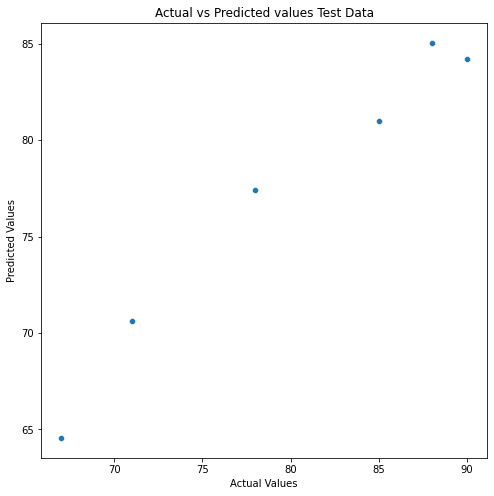

In [38]:
# visualizing the true values and prediction values
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = lr_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# DecisionTreeRegressor

In [39]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_pred)

In [40]:
print(f"R2 Score: {round(r2_score(y_pred, dt_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, dt_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, dt_pred), 2)}")

R2 Score: -1.79
MSE     : 205.67
MAE     : 12.33


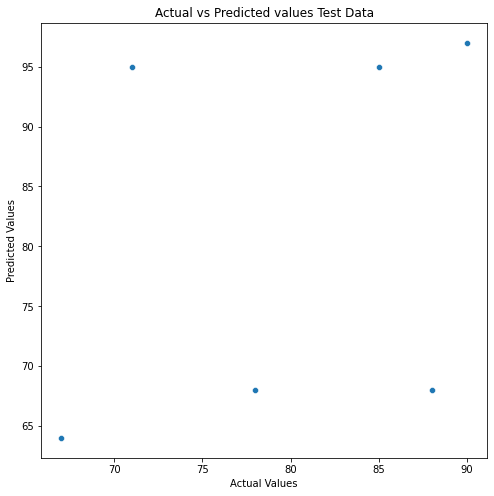

In [41]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = dt_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# RandomForestRegressor

In [42]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_pred)

In [43]:
print(f"R2 Score: {round(r2_score(y_pred, rf_pred), 2)}")
print(f"MSE     : {round(mean_squared_error(y_pred, rf_pred), 2)}")
print(f"MAE     : {round(mean_absolute_error(y_pred, rf_pred), 2)}")

R2 Score: -0.16
MSE     : 85.39
MAE     : 7.02


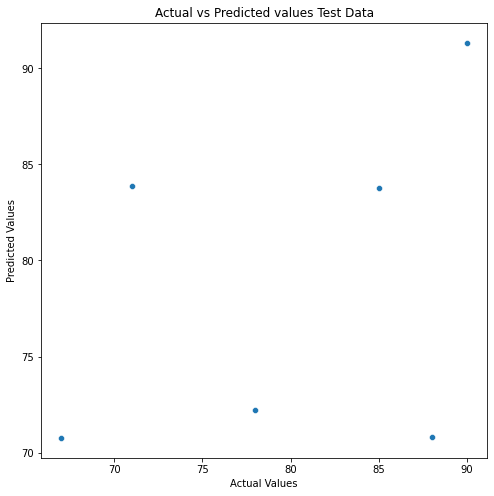

In [44]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = y_pred, y = rf_pred)
plt.title("Actual vs Predicted values Test Data")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [45]:
# import module
from tabulate import tabulate
 
# assign data
mydata =[ ["LinearRegression",r2_score(y_pred, lr_pred),mean_absolute_error(y_pred, lr_pred)],
    ["DecisionTreeRegression",r2_score(y_pred, dt_pred),mean_absolute_error(y_pred, dt_pred)],
    ["RandomForestRegressor",r2_score(y_pred, rf_pred),mean_absolute_error(y_pred, rf_pred)]
        ]

 
# create header
head = ["Model", "r2_score","mean_absolute_error"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
table = pd.DataFrame(mydata)

+------------------------+------------+-----------------------+
| Model                  |   r2_score |   mean_absolute_error |
+========================+============+=======================+
| LinearRegression       |   0.853488 |               2.69804 |
+------------------------+------------+-----------------------+
| DecisionTreeRegression |  -1.7866   |              12.3333  |
+------------------------+------------+-----------------------+
| RandomForestRegressor  |  -0.157025 |               7.02333 |
+------------------------+------------+-----------------------+
